<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/Time_Series_Analysis_ALL_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
%matplotlib inline

In [ ]:
airlines=pd.read_csv('/content/airline_passengers.csv',parse_dates=True,index_col='Month')

In [ ]:
airlines.head(1)

,Thousands of Passengers
Month,
1949-01-01,112


In [ ]:
airlines.dropna(inplace=True)

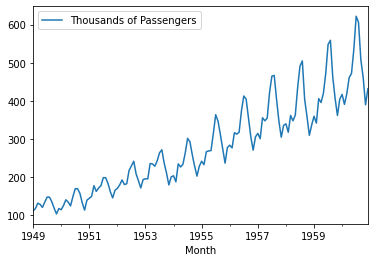

In [ ]:
airlines.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
results=seasonal_decompose(airlines['Thousands of Passengers'],model='additive')

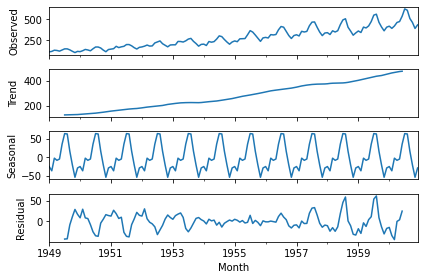

In [ ]:
results.plot();

In [ ]:
#EWMA and SMA
airlines.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
airlines['6month-SMA']=airlines['Thousands of Passengers'].rolling(window=6).mean()
airlines['12month-SMA']=airlines['Thousands of Passengers'].rolling(window=12).mean()

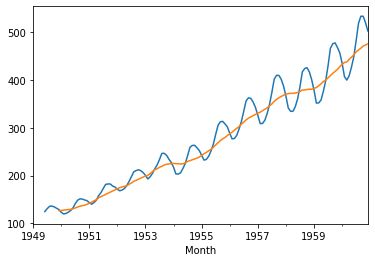

In [ ]:
airlines['6month-SMA'].plot()
airlines['12month-SMA'].plot()

In [ ]:
airlines['EWMA']=airlines['Thousands of Passengers'].ewm(span=15,adjust=False).mean()
#month values so used span=12



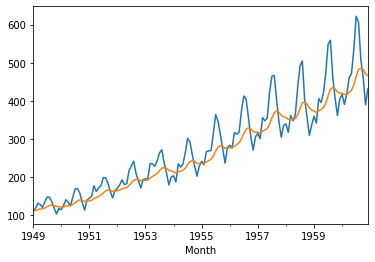

In [ ]:
airlines['Thousands of Passengers'].plot()
airlines['EWMA'].plot()

In [ ]:
#Forecasting
airlines.index.freq='MS'


In [ ]:
airlines.tail()

,Thousands of Passengers,6month-SMA,12month-SMA,EWMA
Month,,,,
1960-08-01,606,519.166667,463.333333,482.122646
1960-09-01,508,534.000000,467.083333,485.357315
1960-10-01,461,534.000000,471.583333,482.312651
1960-11-01,390,520.333333,473.916667,470.773569
1960-12-01,432,503.166667,476.166667,465.926873


In [ ]:
len(airlines)

144

In [ ]:
train_data=airlines.iloc[:100]
test_data=airlines.iloc[100:]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing#Holt Winters

In [ ]:
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)

In [ ]:
fitted_model=fitted_model.fit()

In [ ]:
test_predictions=fitted_model.forecast(39) #36 periods in the future

In [ ]:
test_predictions

In [ ]:
import matplotlib.pyplot as plt


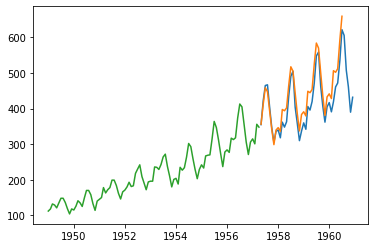

In [ ]:
plt.plot(test_data['Thousands of Passengers'],label='Test')
plt.plot(test_predictions,label='Predictions')
plt.plot(train_data['Thousands of Passengers'],label='Train')

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

In [ ]:
#non stationary
#stationary
df2=pd.read_csv('/content/DailyTotalFemaleBirths.csv',index_col='Date')

In [ ]:
df2.head()

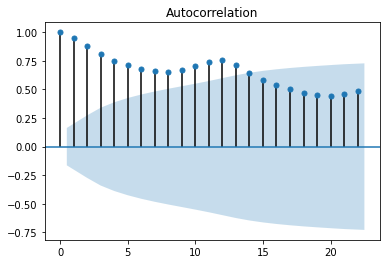

In [ ]:
plot_acf(airlines['Thousands of Passengers']);  


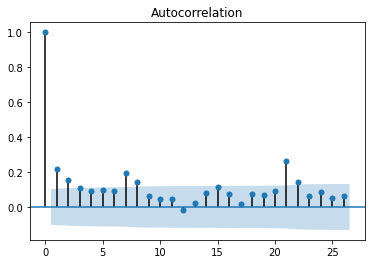

In [ ]:
plot_acf(df2['Births']);

In [ ]:
#AR Model
from statsmodels.tsa.ar_model import AR, ARResults

In [ ]:
uspop=pd.read_csv('/content/uspopulation.csv',index_col='DATE',parse_dates=True)

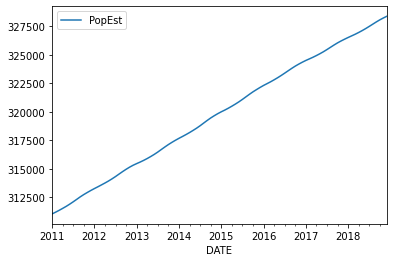

In [ ]:
uspop.plot()

In [ ]:
train=uspop.iloc[:84]
test=uspop.iloc[84:]

In [ ]:
model=AR(train['PopEst'])


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
AR1fit=model.fit(ic='t-stat')

In [ ]:
AR1fit.k_ar  #order

2

In [ ]:
AR1fit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [ ]:
len(uspop)+12

108

In [ ]:
start=len(train)
end=len(train)+len(test)-1
preds=AR1fit.predict(start=start,end=end)


Text(0.5, 1.0, 'AR(2)')

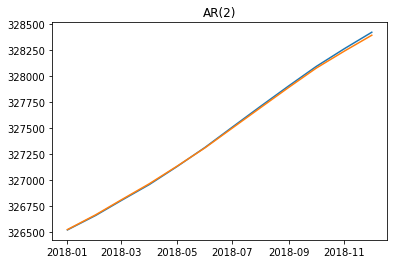

In [ ]:
plt.plot(preds)
#plt.plot(train)
plt.plot(test)
plt.title('AR(2)')

In [ ]:
model=AR(uspop['PopEst'])
fit=model.fit(ic='t-stat')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
future=fit.predict(start=len(uspop),end=len(uspop)+12)

Text(0.5, 1.0, 'AR(8) 12 steps into the future.')

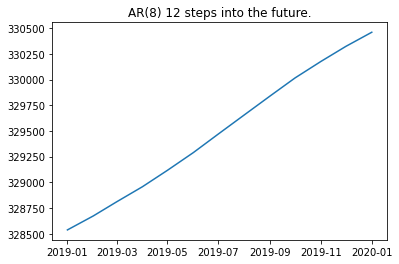

In [ ]:
plt.plot(future)
plt.title('AR(8) 12 steps into the future.')

In [ ]:
from statsmodels.tsa.stattools import adfuller
#adfuller(airlines['Thousands of Passengers'],)
#Time Serries is Non-Stationary. P>0.05 (Reject Null Hypothesis, Series is non-stationary)
#p<0.05 (fail to reject null hypothesis, Series is statonary)

In [ ]:
adfuller(airlines['Thousands of Passengers'])

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [ ]:

#Causailty-Grangers Causlality Test

df4=pd.read_csv('/content/samples.csv')

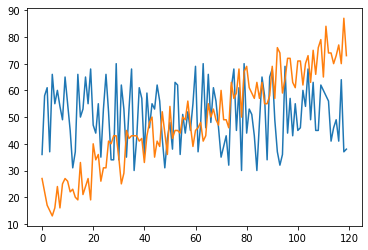

In [ ]:
df4['a'].plot()
df4['b'].plot()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests


In [ ]:
grangercausalitytests(df4[['a','d']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2


{1: ({'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681287, 0.1942027811635669, 116.0, 1.0),
   'ssr_chi2test': (1.7492231682328023, 0.18597442074424264, 1),
   'ssr_ftest': (1.7051251051681098, 0.1942027811635688, 116.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (212.65135382912013, 6.658022084670888e-47, 2),
   'params_ftest': (286.0339426255561, 6.025362015685629e-45, 113.0, 2.0),
   'ssr_chi2test': (597.38062353657, 1.9074176679050054e-130, 2),
   'ssr_ftest': (286.0339426255611, 6.025362015680703e-45, 113.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.1MB/s 
     |████████████████████████████████| 9.5MB 34.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_arima=auto_arima(airlines['Thousands of Passengers'],start_p=0,start_q=0,max_d=4,seasonal=True,max_p=4,max_q=4,trace=True,m=12)

In [ ]:
stepwise_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 28 Jun 2021   AIC                           1019.178
Time:                                     05:24:36   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model=SARIMAX(train_data['Thousands of Passengers'],order=(0,1,1),seasonal_order=(2,1,0,12))

In [ ]:
fitted=model.fit()

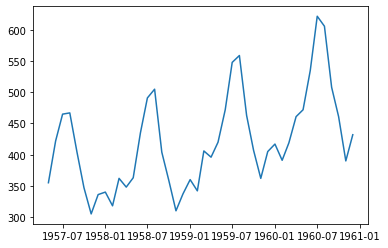

In [ ]:
plt.plot(test_data)

In [ ]:
predicted=fitted.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)

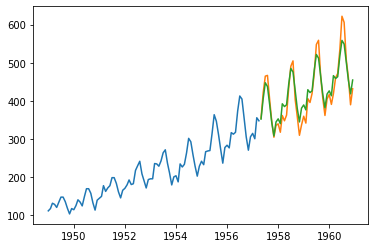

In [ ]:
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test')
plt.plot(predicted,label='Predicted')


In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
df=pd.read_csv('/content/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df.index.freq='D'
trade_inventories=pd.read_csv('/content/TradeInventories.csv',index_col='Date',parse_dates=True)
trade_inventories.freq='MS'

In [ ]:
df.head()
trade_inventories.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


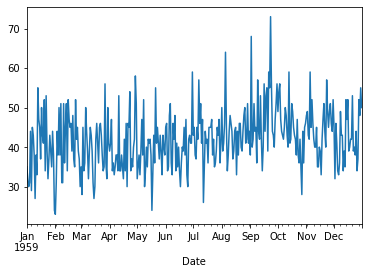

In [ ]:
df['Births'].plot()
df.dropna(inplace=True)

In [ ]:
adfuller(trade_inventories['Inventories']) # non-Stationary Data
#adfuller(trade_inventories['Inventories'])

(-0.08768390982064546,
 0.9506515302298977,
 5,
 258,
 {'1%': -3.455952927706342,
  '10%': -2.572774990685656,
  '5%': -2.8728086526320302},
 4909.597979003463)

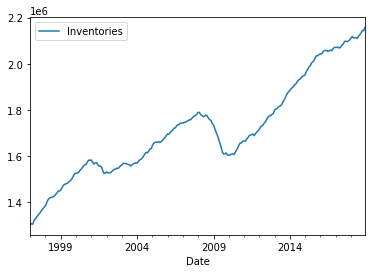

In [ ]:
trade_inventories.plot()
trade_inventories=trade_inventories.astype('float64')

In [ ]:
trade_inventories.head()

,Inventories
Date,
1997-01-01,1301161.0
1997-02-01,1307080.0
1997-03-01,1303978.0
1997-04-01,1319740.0
1997-05-01,1327294.0


In [ ]:
train=trade_inventories.iloc[:252]
test=trade_inventories.iloc[252:]
train=train.astype('float64')
test=test.astype('float64')

In [ ]:
test.head()

,Inventories
Date,
2018-01-01,2110158.0
2018-02-01,2118199.0
2018-03-01,2112427.0
2018-04-01,2112276.0
2018-05-01,2111835.0


In [ ]:
results=seasonal_decompose(df['Births'],model='additive')

In [ ]:
auto_arima(trade_inventories['Inventories'],seasonal=False).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 01 Jul 2021   AIC                           5348.037
Time:                        04:14:17   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model=ARIMA(trade_inventories['Inventories'],order=(0,1,0))
fitted=model.fit()
import warnings
#start=len(train)
#end=len(train)+len(test)-1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [ ]:
start
end

263

In [ ]:
test

,Inventories
Date,
2018-01-01,2110158.0
2018-02-01,2118199.0
2018-03-01,2112427.0
2018-04-01,2112276.0
2018-05-01,2111835.0
2018-06-01,2109298.0
2018-07-01,2119618.0
2018-08-01,2127170.0
2018-09-01,2134172.0


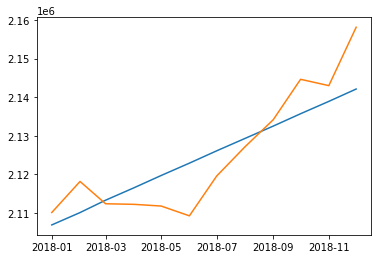

In [ ]:
plt.plot(predicted)
plt.plot(test)

In [ ]:
predicted=fitted.predict(start=start,end=end,typ='levels')

In [ ]:
predicted

2018-01-01    2.106949e+06
2018-02-01    2.110146e+06
2018-03-01    2.113344e+06
2018-04-01    2.116541e+06
2018-05-01    2.119739e+06
2018-06-01    2.122936e+06
2018-07-01    2.126134e+06
2018-08-01    2.129332e+06
2018-09-01    2.132529e+06
2018-10-01    2.135727e+06
2018-11-01    2.138924e+06
2018-12-01    2.142122e+06
Freq: MS, dtype: float64

In [ ]:
test.plot()

In [ ]:
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [ ]:
model.fit().summary()

In [ ]:
forecast=fitted.predict(start=len(trade_inventories),end=len(trade_inventories)+12,typ='levels')

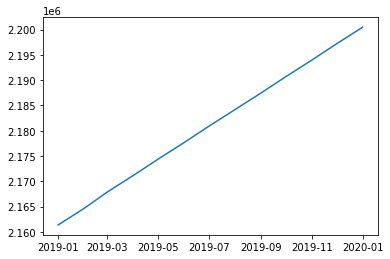

In [ ]:
plt.plot(forecast)

In [ ]:
#SARIMAS


In [ ]:
dfco2=pd.read_csv('/content/co2_mm_mlo.csv',parse_dates=True)

In [ ]:
dfco2['date']=pd.to_datetime({'year':dfco2['year'],'month':dfco2['month'],'day':1})

In [ ]:
dfco2=dfco2.set_index('date')


In [ ]:
dfco2.index.freq='MS'

In [ ]:
#dfco2.dropna(inplace=True)

In [ ]:
dfco2

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


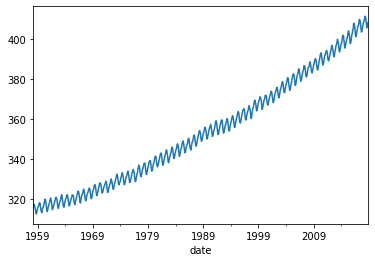

In [ ]:
dfco2['interpolated'].plot()

In [ ]:
results=seasonal_decompose(dfco2['interpolated'],model='additive')

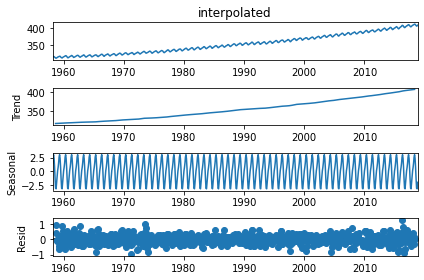

In [ ]:
results.plot();

In [ ]:
adfuller(dfco2['interpolated']) #non-starionary

(4.994847244403938,
 1.0,
 20,
 708,
 {'1%': -3.439620010600208,
  '10%': -2.5689484851894413,
  '5%': -2.8656309041017756},
 497.55447281760144)

In [ ]:
len(dfco2)

729

In [ ]:
train=dfco2.iloc[:700]
test=dfco2.iloc[700:]

In [ ]:
auto_arima(dfco2['interpolated'],seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=463.185, Time=4.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2369.532, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1614.808, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2375.248, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1101.952, Time=3.86 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=770.617, Time=5.72 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=503.763, Time=10.94 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=538.470, Time=9.87 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1440.918, Time=0.79 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=9.79 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=611.738, Time=10.10 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=13.25 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=454.611, Time=4.08 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.693
Date:                              Thu, 01 Jul 2021   AIC                            423.387
Time:                                      22:37:53   BIC                            450.929
Sample:                                           0   HQIC                           434.014
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3549      0.034    -10.294      0.000      -0.422      -0.287
ma.L2         -0.0230      0.032     -0.712      0.476      -0.086       0.040
ma.L3         -0.0836      0.032     -2.607      0.009      -0.146      -0.021
ar.S.L12       0.9996      0.000   2988.504      0.000       0.999       1.000
ma.S.L12      -0.8666      0.021    -40.715      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.342      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.03
Prob(Q):                              0.77   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model=SARIMAX(train['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))
fitted=model.fit()

In [ ]:
predictions=fitted.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
len(predictions)

29

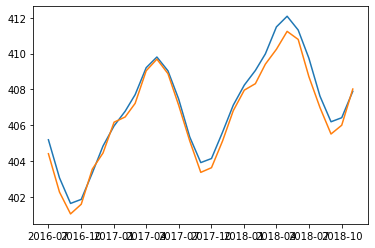

In [ ]:
plt.plot(predictions)
#plt.plot(train['interpolated'][600:])
plt.plot(test['interpolated'])

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/RestaurantVisitors.csv',parse_dates=True,index_col='date')

In [ ]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [ ]:
df.index.freq='D'

In [ ]:
#SARIMA + Exogenous Variable

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


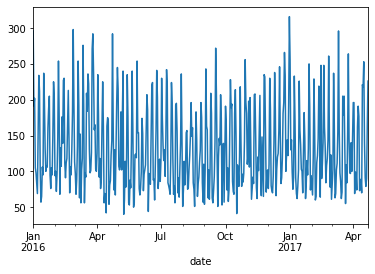

In [ ]:
df['total'].plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

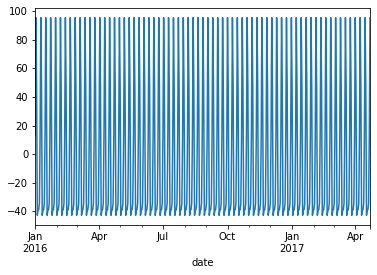

In [ ]:
result=seasonal_decompose(df['total'])
#result.plot();
result.seasonal.plot()

In [ ]:
train=df.iloc[:436]
test=df.iloc[436:]

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_arima(df['total'],seasonal=True,trace=True,m=7).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.89 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=2.31 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=4921.866, Time=3.51 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4788.853, Time=1.49 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.70 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4951.692, Time=3.35 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=1.64 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4775.690, Time=1.35 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.845
Date:                   Fri, 02 Jul 2021   AIC                           4775.690
Time:                           20:03:08   BIC                           4792.369
Sample:                                0   HQIC                          4782.247
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7613      1.654      2.878      0.004       1.519       8.003
ar.S.L7        0.9624      0.013     75.584      0.000       0.937       0.987
ma.S.L7       -0.7581      0.048    -15.672      0.000      -0.853      -0.663
sigma2      1205.5235     70.693     17.053      0.000    1066.968    1344.079
===================================================================================
Ljung-Box (L1) (Q):                  16.20   Jarque-Bera (JB):                64.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.75
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(df['total'],order=(0,0,0),seasonal_order=(1,0,1,7))
fitted=model.fit()
pred=fitted.predict(start=len(train),end=len(train)+len(test)-1)

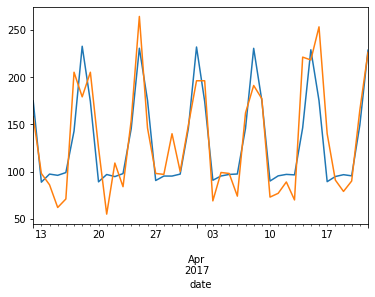

In [ ]:
pred.plot()
test['total'].plot()

In [ ]:
auto_arima(df['total'],exogenous=df[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2354.826
Date:                             Fri, 02 Jul 2021   AIC                           4721.652
Time:                                     20:08:05   BIC                           4746.669
Sample:                                 01-01-2016   HQIC                          4731.487
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.0693      2.614      6.147      0.000      10.946      21.193
holiday       44.5308      3.912     11.384      0.000      36.864      52.197
ar.L1          0.1066      0.042      2.535      0.011       0.024       0.189
ar.S.L7        0.8680      0.020     43.246      0.000       0.829       0.907
ma.S.L7       -0.3771      0.051     -7.407      0.000      -0.477      -0.277
sigma2       960.5702     60.396     15.904      0.000     842.196    1078.945
===================================================================================
Ljung-Box (L1) (Q):                   3.24   Jarque-Bera (JB):                 6.35
Prob(Q):                              0.07   Prob(JB):                         0.04
Heteroskedasticity (H):               0.90   Skew:                             0.27
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model=SARIMAX(df['total'],exog=df[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7))
fitted=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
fitted.summary()

In [ ]:
test['holiday']

In [ ]:
start=len(train)
end=len(train)+len(test)-1

In [ ]:
preds=fitted.predict(start,end,exog=test[['holiday']])

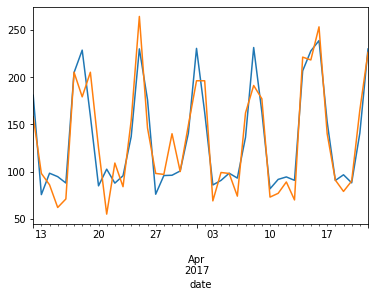

In [ ]:
preds.plot()
test['total'].plot()

In [8]:
MS=pd.read_csv('/content/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
PS=pd.read_csv('/content/PCEPersonalSpending.csv',index_col=0, parse_dates=True)


In [11]:
MS.index.freq='MS'
PS.index.freq='MS'

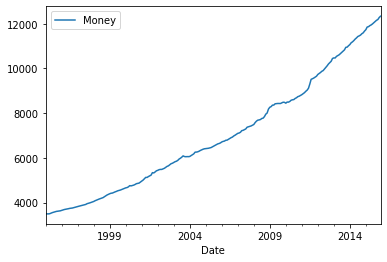

In [12]:
MS.plot()

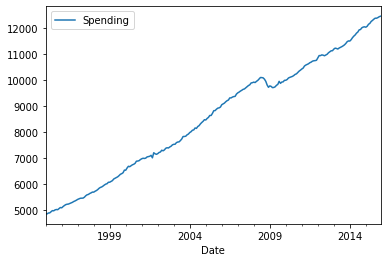

In [13]:
PS.plot()

In [5]:
MS.head()
#PS.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [15]:
MS.dropna(inplace=True)
PS.dropna(inplace=True)

In [6]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(MS['Money']) #non stationary

(4.2390224256706475,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '10%': -2.5730443824681606,
  '5%': -2.873313676101283},
 2219.917877142354)

In [18]:
adfuller(PS['Spending']) #non stationary

(0.14979608598625302,
 0.9693009944428311,
 3,
 248,
 {'1%': -3.4569962781990573,
  '10%': -2.573018897632674,
  '5%': -2.8732659015936024},
 2339.735574840993)

In [19]:
MS_diffed=MS.diff()
PS_diffed=PS.diff()

In [25]:
MS_diffed.dropna(inplace=True)
PS_diffed.dropna(inplace=True)

In [24]:
adfuller(MS_diffed['Money'])

(-2.0574040497379418,
 0.2619837978511234,
 15,
 235,
 {'1%': -3.4584868856997004,
  '10%': -2.573367247623359,
  '5%': -2.873918902362675},
 2222.948346069441)

In [27]:
MS_diffed_2=MS_diffed.diff()

In [29]:
MS_diffed_2.dropna(inplace=True)

In [32]:
#adfuller(PS_diffed['Spending'])
adfuller(MS_diffed_2['Money'])  #both are now stationary

(-7.077470794343017,
 4.760674931296131e-10,
 14,
 235,
 {'1%': -3.4584868856997004,
  '10%': -2.573367247623359,
  '5%': -2.873918902362675},
 2217.0972028268266)

In [36]:
df=pd.concat([MS_diffed_2,PS_diffed],axis=1)

In [39]:
df.dropna(inplace=True)

In [40]:
df

,Money,Spending
Date,,
1995-03-01,3.7,34.6
1995-04-01,6.9,4.8
1995-05-01,16.9,42.9
1995-06-01,-0.3,44.4
1995-07-01,-6.2,-7.3
...,...,...
2015-08-01,-0.7,38.6
2015-09-01,5.5,-1.2
2015-10-01,-23.1,23.3


In [41]:
nobs=12 #num of observations
train=df[:-nobs]
test=df[-nobs:]


In [ ]:
train

In [ ]:
#GRIDSEARCH FOR ORDER P AR of VAR model

In [47]:
model=VAR(train)


In [48]:
for p in range(0,8):
  result=model.fit(p)
  print('order {}'.format(p) )
  print('AIC {}'.format(result.aic))
  print('\n')

order 0
AIC 14.046876849439696


order 1
AIC 13.893730044437806


order 2
AIC 13.788978767127503


order 3
AIC 13.800828407726483


order 4
AIC 13.705254945442736


order 5
AIC 13.702894884622165


order 6
AIC 13.716410512160271


order 7
AIC 13.722469221920354




In [49]:
results=model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Jul, 2021
Time:                     02:10:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.0287
Nobs:                     233.000    HQIC:                   13.8343
Log likelihood:          -2235.61    FPE:                    893620.
AIC:                      13.7029    Det(Omega_mle):         814863.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -1.884757         3.499904           -0.539           0.590
L1.Money           -0.643407         0.068285           -9.422           0.000
L1.Spending        -0.087249         0.054567           -1.599      